# Import the model and calculate the PSF


Initializing all FITS based elements from...
SPC825 Optics directory: /groups/douglase/webbpsf-data/CGI/optics/F825
DEBUG:poppy:Trans: /groups/douglase/webbpsf-data/CGI/optics/F825/pupil_SPC-20181220_1k_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F825/pupil_SPC-20181220_1k_rotated.fits
DEBUG:poppy:Trans: /groups/douglase/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:OPD: None
INFO:poppy:Shaped Pupil Mask: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:Trans: /groups/douglase/webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:poppy:OPD: None
INFO:poppy:ANNULAR FPM: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F825/fpm_0.05lamdivD.fits
DEBUG:poppy:FITSFPMElement ANNULAR FPM initialized:centering style ADJUSTABLE, central wavelength for opera

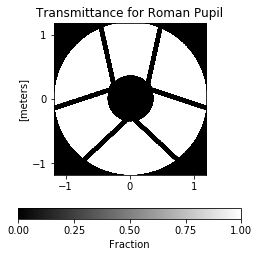

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


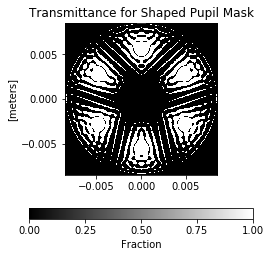

DEBUG:poppy:Display pixel scale = 0.00360017320325374 arcsec / pix 


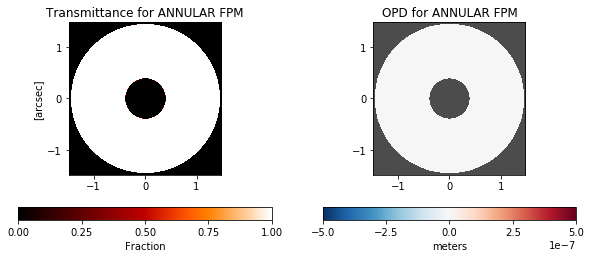

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


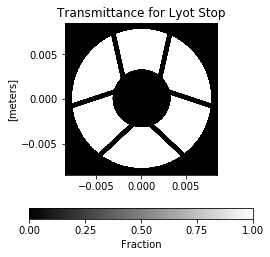

DEBUG:poppy:Display pixel scale = 0.000990599999999999 m / pix 


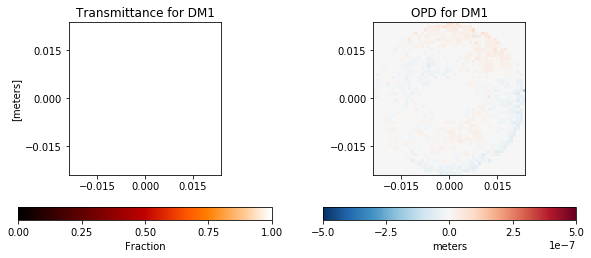

DEBUG:poppy:Display pixel scale = 0.000990599999999999 m / pix 


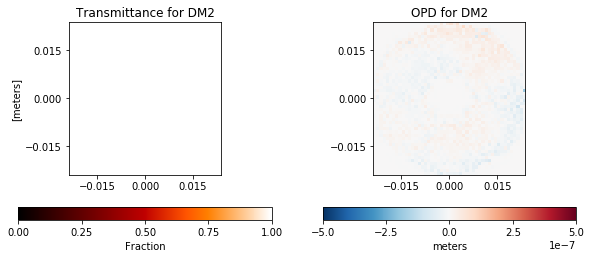

DEBUG:poppy:Display pixel scale = 0.004734 m / pix 


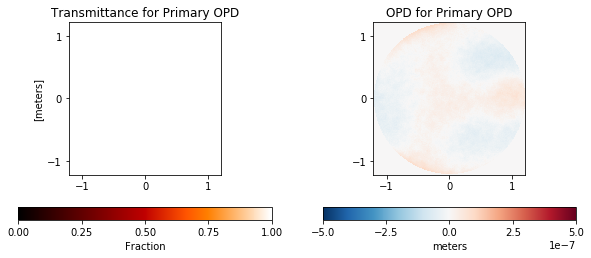

INFO:poppy:Computing both for Zernike WFE sampled onto 512 pixel grid with pixelscale 0.006923839453125 m / pix
DEBUG:poppy:Display pixel scale = 0.006923839453125 m / pix 


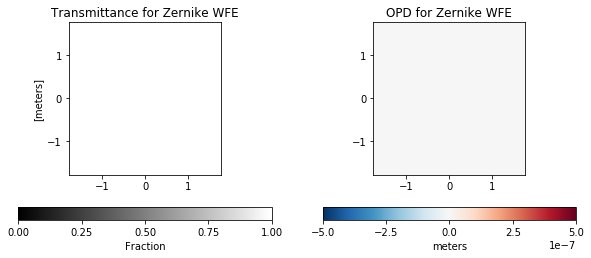

INFO:poppy:Initialized OpticalSystem: SPC825
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Zernike WFE after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Secondary aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 1 after separation: 2.99e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.68e+00 m 
INFO:poppy:Added optic: M-3 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M-4 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: M-5 aperture after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 2 after separation: 3.51e-01 m 
INFO:poppy:Added optic: FSM after separation: 3.65e-01 m 
INFO:poppy:Added optic: OAP1 after separation: 3.55e-01 m 
INFO:poppy:Ad

DEBUG:poppy:Waist to Spherical propagation, dz=-0.5531286914438764 m
DEBUG:poppy:Applying spherical phase curvature =-5.53e-01 m
DEBUG:poppy:Applying spherical lens phase =-1.81e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.222501 s, full function  in 0.233 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 2.29e+00 m ------
DEBUG:poppy:------ Applying Lens: Secondary ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:6.308e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.515e-06 m
DEBUG:poppy:  Beam radius at Secondary =2.30e-01 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:6.308e-07 m, z_w0=2.838e+00 m
z=2.285e+00 m, z_r=1.515e-06 m
DEBUG:poppy: input curved wavefront and Secondary has output beam curvature of =-3.58e+00 m
DEBUG:poppy:Secondary has a curvature of =-3.58e+00 m
DEBUG:poppy:Secondary has a c

DEBUG:poppy:Applying spherical phase curvature =9.20e+06 m
DEBUG:poppy:Applying spherical lens phase =1.09e-07 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M4
DEBUG:poppy:------ Optic: M4 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: M-4 aperture after distance 0.0 m 
DEBUG:poppy:  Multiplied WF by phasor for Optic: M-4 aperture
DEBUG:poppy:  Propagating wavefront to Lens: M5, with focal length 0.198821518772608 m after distance 0.429145636743193 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 8.133678565106518 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 4.552196414893311e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.23032398203399929 m
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.222117 s, full function  in 0.233 s
DEBUG:poppy:Applying spherical phase curvature =2.30e-01 m
DEBUG:poppy:Applying spherical lens 

DEBUG:poppy:Waist to Spherical propagation, dz=0.5791569757415687 m
DEBUG:poppy:Applying spherical phase curvature =5.79e-01 m
DEBUG:poppy:Applying spherical lens phase =1.73e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.225396 s, full function  in 0.235 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.05e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP2 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:6.570e-06 m, z_w0=9.907e+00 m
z=1.049e+01 m, z_r=1.644e-04 m
DEBUG:poppy:  Beam radius at OAP2 =2.32e-02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:6.570e-06 m, z_w0=9.907e+00 m
z=1.049e+01 m, z_r=1.644e-04 m
DEBUG:poppy: input curved wavefront and OAP2 has output beam curvature of =-3.34e+06 m
DEBUG:poppy:OAP2 has a curvature of =-3.34e+06 m
DEBUG:poppy:OAP2 has a curved output wavefront, with 

DEBUG:poppy:resampled optic shape: (1025, 1025)   wavefront shape: (2048, 2048)
DEBUG:poppy:padded an optic with a 511 x 511 border to optic to match the wavefront
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Shaped Pupil Mask 
DEBUG:poppy:  Propagating wavefront to Lens: OAP5, with focal length 0.548189351937178 m after distance 0.408810648253099 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 14.932241851791904 m
DEBUG:poppy:  Plane to Plane Regime, dz=0.408810648253099 m
DEBUG:poppy:  Constant Pixelscale: 1.6601939187162024e-05 m / pix
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.287033 s, full function  in 0.297 s
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.234070 s, full function  in 0.245 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.52e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP5 ------
DEBUG:poppy:  P

DEBUG:poppy:------ Applying Lens: OAP7 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:8.500e-03 m, z_w0=1.728e+01 m
z=1.734e+01 m, z_r=2.751e+02 m
DEBUG:poppy:  Beam radius at OAP7 =8.50e-03 m
DEBUG:poppy: input flat wavefront and OAP7 has output beam curvature of =-7.08e-01 m
DEBUG:poppy:OAP7 has a curvature of =-7.08e-01 m
DEBUG:poppy:OAP7 has a curved output wavefront, with waist at 18.046947540339012 m
DEBUG:poppy:Post Optic Parameters:w_0:2.188e-05 m, z_w0=1.805e+01 m
z=1.734e+01 m, z_r=1.823e-03 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.708251083480054 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =1.07e+05 m
DEBUG:poppy:Applying spherical lens phase =9.36e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP7
DEBUG:poppy:------ Optic: OAP7 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP7 aperture after distan

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.093165207859226 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.049957812278897507 m
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.270900 s, full function  in 0.281 s
DEBUG:poppy:Applying spherical phase curvature =5.00e-02 m
DEBUG:poppy:Applying spherical lens phase =2.00e+01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.272624 s, full function  in 0.283 s
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.230803 s, full function  in 0.241 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.91e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: focus
INFO:poppy:

<Figure size 1080x1080 with 0 Axes>

(2048, 2048) 1.3301298784040454e-05 m / pix


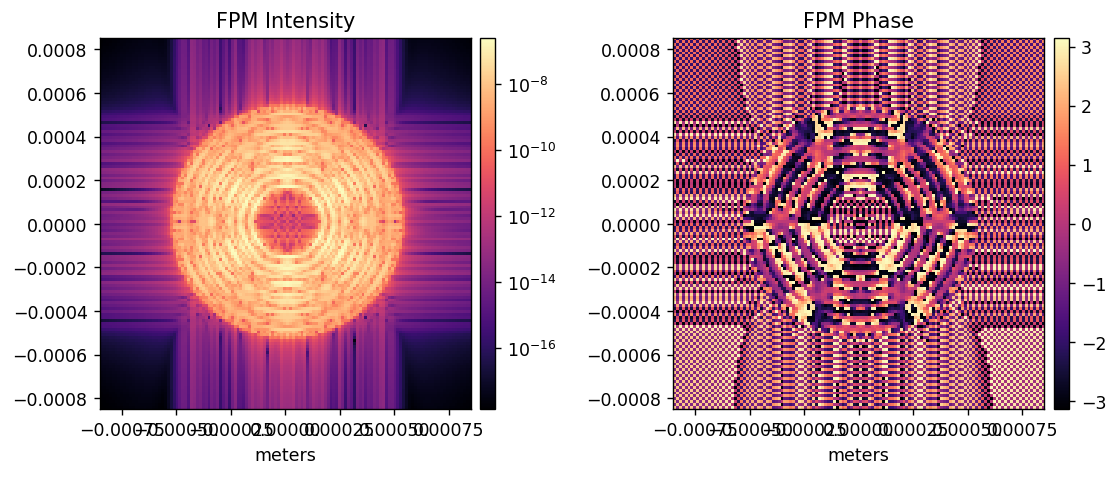

(2048, 2048) 2.4106746597129473e-05 m / pix


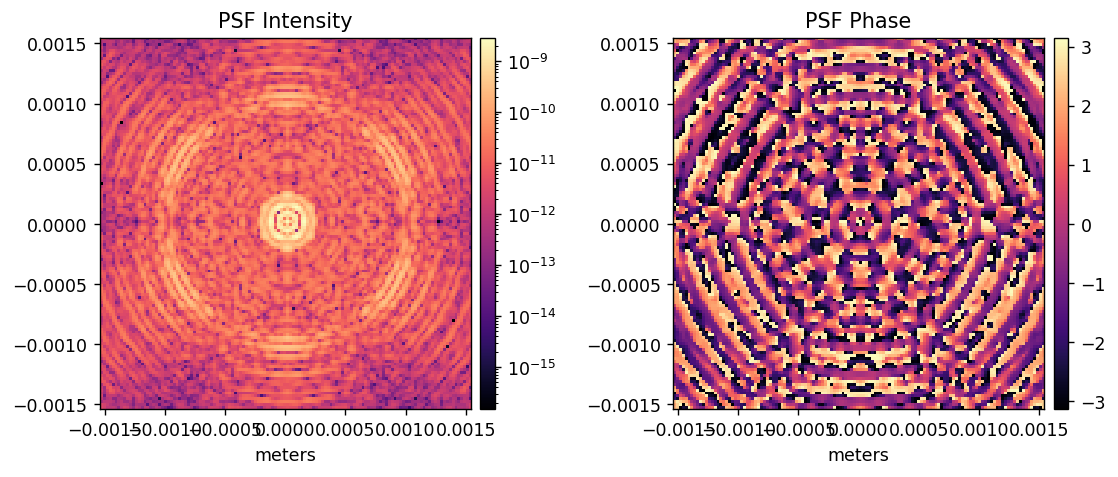

spc825-fresnel-wavefronts/wf_psf_proper.fits
(512, 512) 4.82220314538878e-06 m / pix


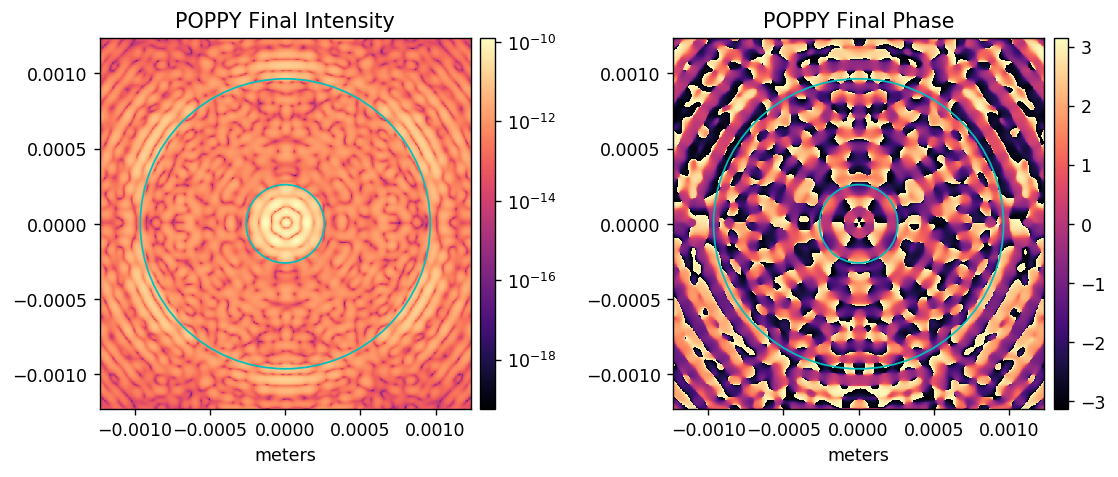

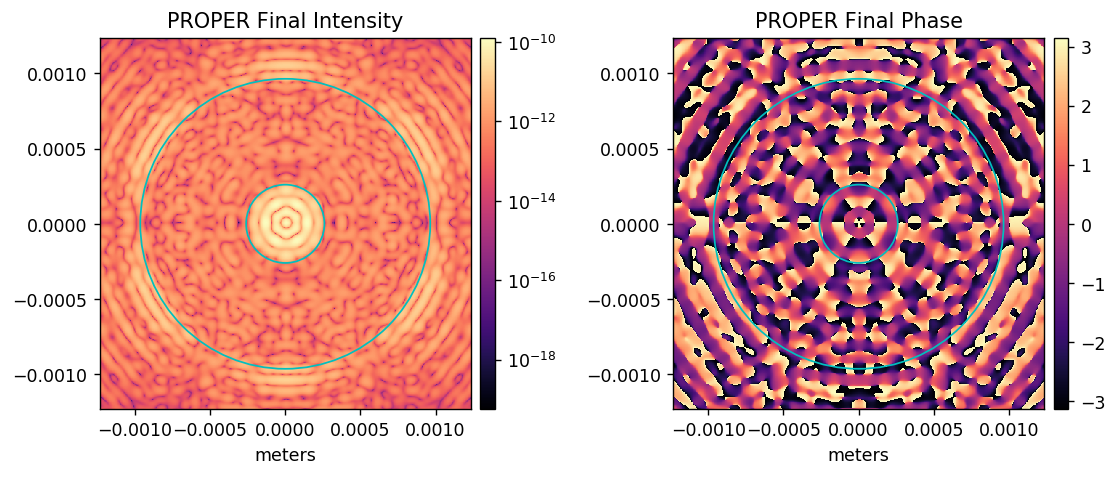

3.4103189604451405e-18 1.242975472750247e-10
5.58773190439697e-20 1.213794817346626e-10
Total flux from POPPY:  4.526695309253932e-07
Total flux from PROPER:  4.4689710251724684e-07


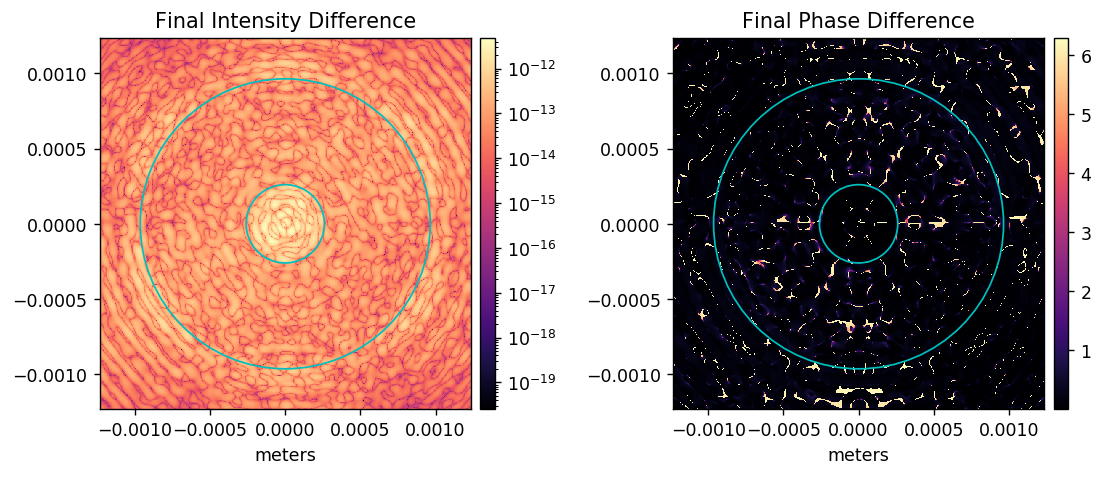

In [30]:
from importlib import reload
import misc
reload(misc)

import romancgi_modes as modes
reload(modes)

tilts = (-825e-9, 0)
psf,wfs = modes.run_model(npix=1024,
                          oversample=2,
                          mode='SPC825',
#                           lambda_m=700e-9*u.m,
#                           tilts=tilts,
                          use_fpm=True,
#                           use_errors=True,
#                           use_dms=True,
#                           use_fieldstop=True,
                          use_apertures=True,
#                           display_intermediates=True,
                         )



# Run the PROPER models for comparisons.

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Circle
import numpy as np
import astropy.io.fits as fits 
import astropy.units as u
import time

import proper
import poppy

import wfirst_phaseb_proper
wfirst_phaseb_proper.set_data_dir()

wfirst_phaseb_proper.copy_here()
wfirst_phaseb_proper.copy_examples_here()

Copying run_flatten.py to current directory
Copying run_hlc_erkin.py to current directory
Copying run_hlc_input_fields.py to current directory
Copying run_hlc.py to current directory
Copying run_spc_spec.py to current directory
Copying run_spc_wide.py to current directory


Lambda = 7.3000E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  79.6690
PROPER calculation completed in 79.8627s


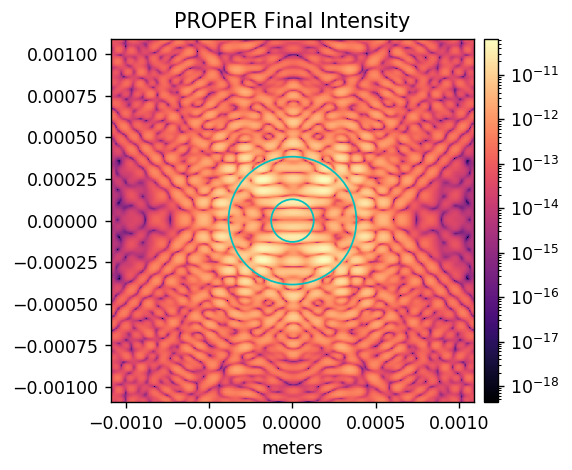

spc730-fresnel-wavefronts/wf_psf_proper.fits


In [7]:
nlam = 1
lam_array = np.array([0.730])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
if use_errors==0:
    use_dm1 = 0
    use_dm2 = 0
    polaxis = 0
else:
    use_dm1 = 1
    use_dm2 = 1
    polaxis = 10

dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm2.fits' )

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-spec_long',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              pxscl=psf_sampling_m,
              lognorm=True,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fpath = 'spc730-fresnel-wavefronts/wf_'
if use_errors==1: wf_fpath += 'ab_'
wf_fpath += 'psf_'
if use_fpm==0: wf_fpath += 'nofpm_'
if xoffset!=0: wf_fpath += 'offax_'
wf_fpath += 'proper.fits'
print(wf_fpath)

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fpath, overwrite=True)

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  72.5606
PROPER calculation completed in 72.7254s


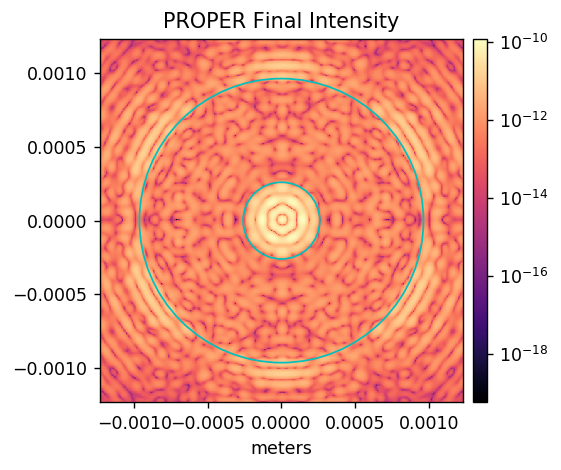

spc825-fresnel-wavefronts/wf_psf_proper.fits


In [8]:
nlam = 1
lam_array = np.array([0.825])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
if use_errors==0:
    use_dm1 = 0
    use_dm2 = 0
    polaxis = 0
else:
    use_dm1 = 1
    use_dm2 = 1
    polaxis = 10

dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm2.fits' )

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-wide',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':0,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 5.4/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 20/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              lognorm=True,
              pxscl=psf_sampling_m,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fpath = 'spc825-fresnel-wavefronts/wf_'
if use_errors==1: wf_fpath += 'ab_'
wf_fpath += 'psf_'
if use_fpm==0: wf_fpath += 'nofpm_'
if xoffset!=0: wf_fpath += 'offax_'
wf_fpath += 'proper.fits'
print(wf_fpath)

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fpath, overwrite=True)

# Test the FITSFPMElement functionality. 

SPC730 Optics directory: /groups/douglase/webbpsf-data/CGI/optics/F730
DEBUG:poppy:Trans: /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
DEBUG:poppy:OPD: /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
INFO:poppy:BOWTIE FPM: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
INFO:poppy:BOWTIE FPM: Loaded OPD from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
DEBUG:poppy:FITSFPMElement BOWTIE FPM initialized:centering style ADJUSTABLE, central wavelength for operation 7.3e-07 m, Entrance pupil diameter of system 2.3633372 m, 
DEBUG:poppy:Display pixel scale = 0.0006371215608182376 arcsec / pix 


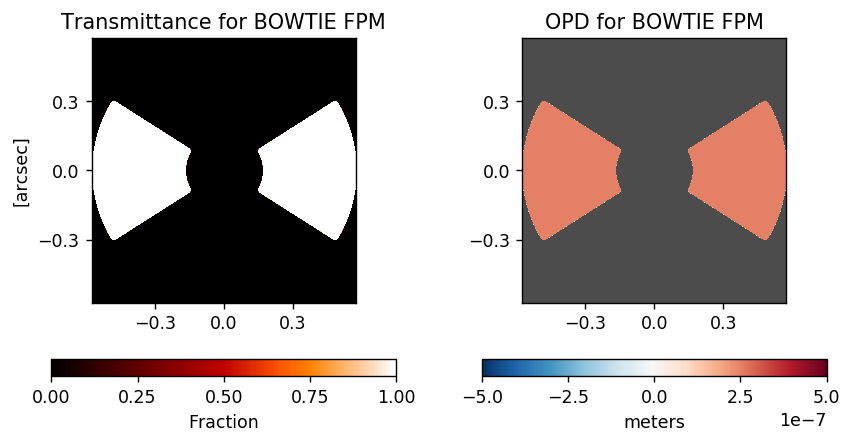

DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).


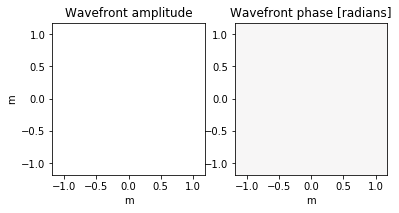

DEBUG:poppy:------ Applying FITS FPM using FFT and MFT sequence ------
DEBUG:poppy:Calculating FPM phasor from numexpr.
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.184701 s, full function  in 0.219 s
DEBUG:poppy:Inverse MatrixFourierTransform: array shape (2048, 2048), centering style ADJUSTABLE, output region size 36.02 in lambda / D units, output array size 1801 pixels, offset None
DEBUG:poppy:Forward MatrixFourierTransform: array shape (1801, 1801), centering style ADJUSTABLE, output region size 36.02 in lambda / D units, output array size 2048 pixels, offset None
DEBUG:poppy:using numpy FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.190866 s, full function  in 0.225 s
DEBUG:poppy:------ FITs FPM Optic: BOWTIE FPM applied ------


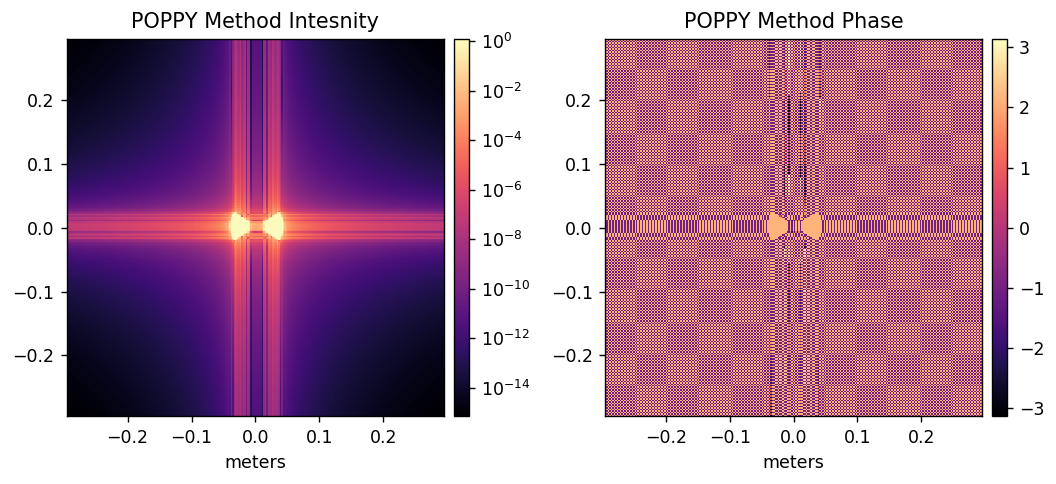

(2048, 2048)
BOWTIE FPM
7.3e-07 m
2.3633372 m
ADJUSTABLE
0.0006371215608182376 arcsec / pix
0.01
PlaneType.intermediate
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
from pathlib import Path
import poppy
from poppy.poppy_core import PlaneType
import numpy as np
import astropy.units as u
import astropy.io.fits as fits

from IPython.display import display
import matplotlib.pyplot as plt

import logging, sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

import misc
from importlib import reload
reload(poppy)
reload(misc)

D = 2.3633372*u.m
opticsdir = Path('/groups/douglase/webbpsf-data/CGI/optics/F730'); print('SPC730 Optics directory:',opticsdir)

fpm = poppy.FITSFPMElement('BOWTIE FPM', 
                           str(opticsdir/'FPM_res100_SPC-20190130.fits'), 
                           opd=str(opticsdir/'FPM_res100_SPC-20190130.fits'), opdunits='meter',
                           wavelength_c=730e-9*u.m, 
                           ep_diam=D, 
                           pixelscale_lamD=0.01,
                           centering='ADJUSTABLE',
                          )
fpm.opd *= 2.5e-7
fig=plt.figure(figsize=(8,4),dpi=125); fpm.display(what='both'); plt.subplots_adjust(wspace=0.25); plt.close(); display(fig)

wf = poppy.FresnelWavefront(wavelength=730e-9, npix=1024, oversample=2, beam_radius=D/2)
fig = plt.figure(); wf.display(what='both'); plt.close(); display(fig)

wf.apply_fits_fpm_fftmft(fpm)

misc.myimshow2(np.abs(wf.wavefront)**2, np.angle(wf.wavefront), 
               'POPPY Method Intesnity', 'POPPY Method Phase',
               n=256, pxscl=wf.pixelscale, lognorm1=True, wspace=0.25)
print(wf.wavefront.shape)
print(fpm.name)
print(fpm.wavelength_c)
print(fpm.ep_diam)
print(fpm.centering)
print(fpm.pixelscale)
print(fpm.pixelscale_lamD)
print(fpm.planetype)
print(fpm.opd)

# Check difference between wavefronts. 



spc730-fresnel-wavefronts/wf_fpm_test_proper.fits


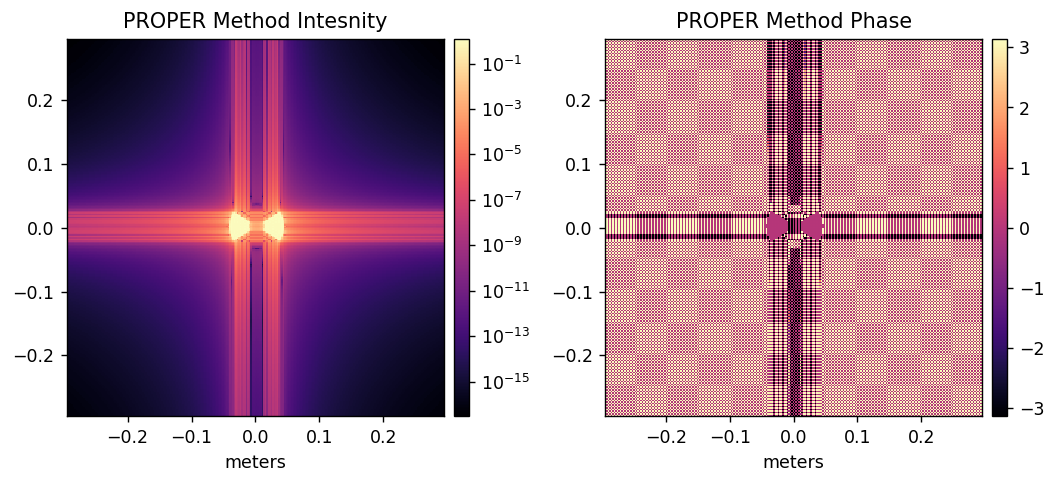

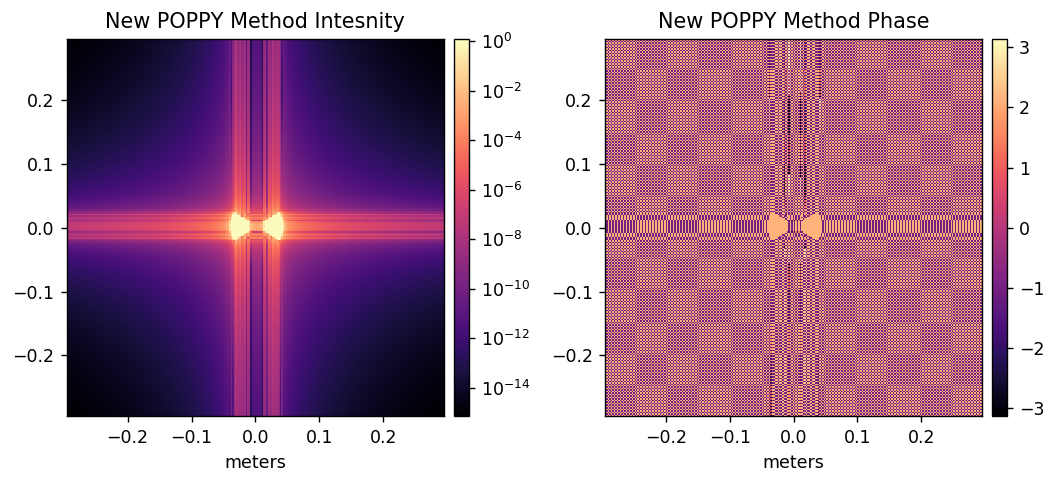

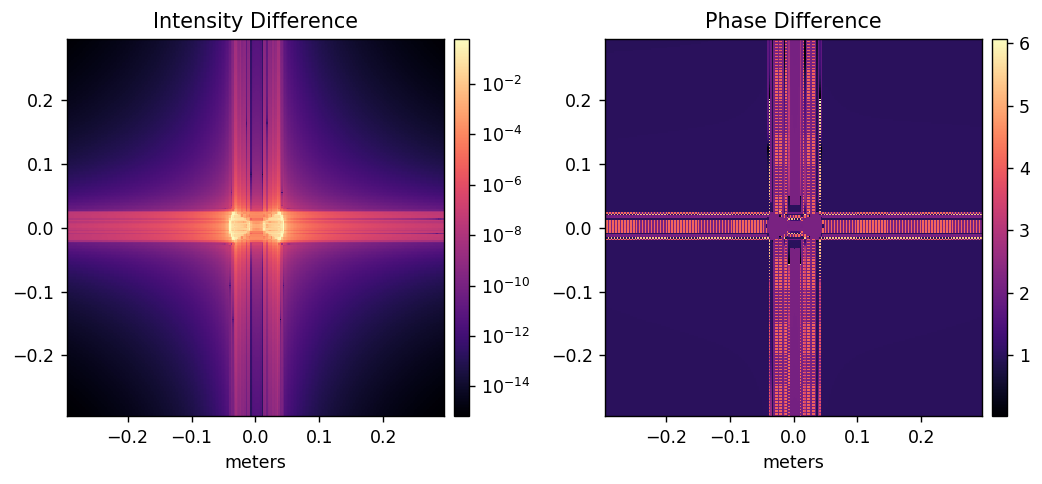

In [4]:
reload(misc)
prop_wf_fpath = 'spc730-fresnel-wavefronts/wf_fpm_test_proper.fits'; print(prop_wf_fpath)
prop_wf = fits.getdata(prop_wf_fpath)
prop_hdr = fits.getheader(prop_wf_fpath)
prop_pxscl = prop_hdr['PIXELSCL']*u.m/u.pix

misc.myimshow2(prop_wf[0], prop_wf[1], 
               'PROPER Method Intesnity', 'PROPER Method Phase',
               n=256, pxscl=prop_pxscl, lognorm1=True, wspace=0.25)

# now show the wf from the poppy method
misc.myimshow2(np.abs(wf.wavefront)**2, np.angle(wf.wavefront), 
               'New POPPY Method Intesnity', 'New POPPY Method Phase',
               n=256, pxscl=wf.pixelscale, lognorm1=True, wspace=0.25)

# now show the difference
misc.myimshow2(np.abs(np.abs(wf.wavefront)**2 - prop_wf[0]),
               np.abs(np.angle(wf.wavefront) - prop_wf[1]), 
               'Intensity Difference', 'Phase Difference',
               n=256, pxscl=wf.pixelscale, 
               lognorm1=True, 
               wspace=0.25)